# **Imports**

In [ ]:
import pandas as pd
from random import randint
import numpy as np

# **Read the data**

In [ ]:
data = pd.read_csv('CRYPTOCURRENCY_COINDESK_BTCUSD_NEW.csv')

## **Preprocessing**

Four different feature were created from 'Date' Column.
Year, Month, Day and Day number which shows the index of current day in the data.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [ ]:
data['year'] = data['year'] % 2020 + 1

In [ ]:
data['day_number'] = data.index.values + 1

In [ ]:
data['Close'] = data['Close'].apply(lambda s: s.replace(',', ''))
data['Close'] = data['Close'].astype('float32')

In [ ]:
fn = ['year', 'month', 'day', 'day_number']
an = ['year', 'month', 'day', 'day_number', 'Close']

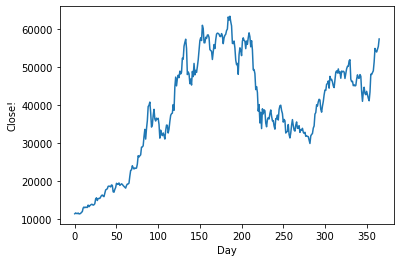

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['Close'])
plt.xlabel('Day')
plt.ylabel('Close!')
plt.show()

# **Normalization**

In [ ]:
max_v = np.amax(np.array(data[an].values), axis=0)
min_v = np.amin(np.array(data[an].values), axis=0)
mean_v = np.mean(np.array(data[an].values), axis=0)

def normalize(X):
  return (X - np.mean(X, axis=0)) / (np.amax(X, axis=0) - np.amin(X, axis=0))

data[an] = normalize(np.array(data[an].values))

In [ ]:
def denormalize(n, maxv, minv, meanv):
  return (n * (maxv - minv)) + meanv

In [ ]:
data

,Date,Close,year,month,day,day_number
0,2020-10-11,-0.525500,-0.775956,0.314953,-0.156922,-0.500000
1,2020-10-12,-0.521389,-0.775956,0.314953,-0.123588,-0.497260
2,2020-10-13,-0.523829,-0.775956,0.314953,-0.090255,-0.494521
3,2020-10-14,-0.524616,-0.775956,0.314953,-0.056922,-0.491781
4,2020-10-15,-0.521774,-0.775956,0.314953,-0.023588,-0.489041
...,...,...,...,...,...,...
361,2021-10-07,0.297575,0.224044,0.314953,-0.290255,0.489041
362,2021-10-08,0.292696,0.224044,0.314953,-0.256922,0.491781
363,2021-10-09,0.306140,0.224044,0.314953,-0.223588,0.494521
364,2021-10-10,0.321006,0.224044,0.314953,-0.190255,0.497260


# **Train validation Split**

In [ ]:
def train_val_split(data, p):
  length = len(data)
  t_l = int(length * p)

  l = []
  while len(l) != length - t_l:
    t = randint(0, length-1)
    if t not in l:
      l.append(t)

  X_val =  data.loc[l]
  y_val = data.loc[l]  
  X_val =  X_val[fn]
  y_val = y_val[['Close']]


  X_train = data.drop(l)
  y_train = data.drop(l)
  X_train = X_train[fn]
  y_train = y_train[['Close']]
  return X_train, y_train, X_val, y_val

In [ ]:
X_train, y_train, X_valid, y_valid = train_val_split(data, 0.8)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid =  np.array(X_valid)
y_valid = np.array(y_valid)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(292, 4)
(292, 1)
(74, 4)
(74, 1)


# **Model**

In [ ]:
def cost_function(y, p):
  m = len(y)
  cost = (1 / m) * np.sum(np.multiply((y - p),(y - p)))
  return cost

In [ ]:
def calc_derivative(X, y, p):
  w_d = (-2 / len(X)) * np.dot(X.transpose(), (y - p))
  b_d = (-2 / len(X)) * np.sum((y - p))
  return w_d, b_d

In [ ]:
calc_derivative(X_train, y_train, y_train + 1)

(array([[-0.00396736],
        [-0.00023137],
        [-0.02457395],
        [-0.00623006]]), 2.0)

In [ ]:
def predict(X, W, b):
  return np.dot(X, W) + b

In [ ]:
def gradient_descent(X, y, X_valid, y_valid, n_itrs = 100000, alpha = 0.001):
  # W = np.zeros((X_train.shape[1], 1))
  # b = 0
  W = np.random.random_sample((X_train.shape[1], 1))
  b = np.random.random_sample((1, 1))
  valid_costs = []
  grads = []
  derivatives = []
  for i in range(n_itrs+1):
    p = predict(X, W, b)
    
    cost = cost_function(y, p)
    grads.append(cost)

    # calculate the cost for validation part with current weights
    v_c = cost_function(y_valid, predict(X_valid, W, b))
    valid_costs.append(v_c)
    
    # calculate derivatives
    derv_w, derv_b = calc_derivative(X, y, p)
    derivatives.append([derv_w, derv_b])

    # new weights
    W -= alpha * derv_w
    b -= alpha * derv_b
    
    if i % 1000 == 0:
      print(i)
      print(cost)
      print()
  return W, b, grads, derivatives

In [ ]:
y_train.shape

(292, 1)

In [ ]:
W, b, grds, derivatives = gradient_descent(X_train, y_train, X_valid, y_valid)

0
0.4447141041084493

1000
0.10155169499444523

2000
0.0750493174229831

3000
0.060367722598533534

4000
0.050098657349679686

5000
0.0428511804814102

6000
0.03772980047931445

7000
0.03410890215305324

8000
0.03154821235668563

9000
0.029737067576476345

10000
0.028455981884231683

11000
0.027549792052701267

12000
0.026908774312378266

13000
0.026455325914775295

14000
0.026134557701652253

15000
0.02590764444297684

16000
0.025747122868953167

17000
0.025633566340040038

18000
0.025553232897247476

19000
0.025496401689250166

20000
0.025456196267243998

21000
0.025427752243769353

22000
0.025407628529011322

23000
0.025393390858991297

24000
0.025383317194282575

25000
0.025376189324745346

26000
0.02537114545336657

27000
0.025367575914996415

28000
0.025365049407780765

29000
0.02536326080881642

30000
0.025361994258299436

31000
0.025361097044570485

32000
0.02536046112975745

33000
0.02536001008045367

34000
0.025359689822006096

35000
0.025359462097710034

36000
0.025359299841

In [ ]:
p = predict(X_valid, W, b)

In [ ]:
cost_function(y_valid, p)

0.024112808054477835

In [ ]:
W

array([[ 0.84671697],
       [ 0.29681802],
       [-0.00555184],
       [-0.31798115]])

In [ ]:
b

array([[-0.00384835]])

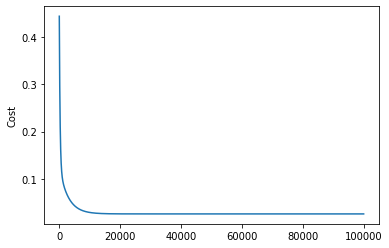

In [ ]:
import matplotlib.pyplot as plt
plt.plot(grds)
plt.ylabel('Cost')
plt.show()

In [ ]:
wp = predict(np.array(data[fn]), W, b)

In [ ]:
dp = data.copy()
dp['Close'] = wp

Denormalization of actual values and predicted valuse!

In [ ]:
data[an] = denormalize(data[an], max_v, min_v, mean_v)

In [ ]:
dp[an] = denormalize(dp[an], max_v, min_v, mean_v)

In [ ]:
dp

,Date,Close,year,month,day,day_number
0,2020-10-11,17492.932855,1.0,10.0,11.0,1.0
1,2020-10-12,17437.937480,1.0,10.0,12.0,2.0
2,2020-10-13,17382.942105,1.0,10.0,13.0,3.0
3,2020-10-14,17327.946731,1.0,10.0,14.0,4.0
4,2020-10-15,17272.951356,1.0,10.0,15.0,5.0
...,...,...,...,...,...,...
361,2021-10-07,45242.602287,2.0,10.0,7.0,362.0
362,2021-10-08,45187.606912,2.0,10.0,8.0,363.0
363,2021-10-09,45132.611538,2.0,10.0,9.0,364.0
364,2021-10-10,45077.616163,2.0,10.0,10.0,365.0


Comparing the actual values vs predicted values

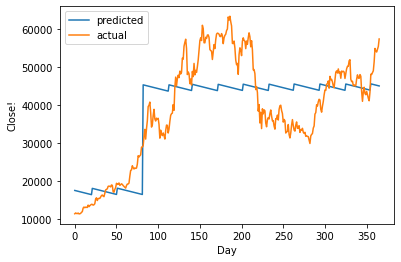

In [ ]:
plt.plot(dp['Close'], label='predicted')
plt.plot(data['Close'], label='actual')
plt.legend(loc='best')
plt.xlabel('Day')
plt.ylabel('Close!')
plt.show()